In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I. Import des données

Quelques lignes posent problème à l'intégration, on les ignore

In [2]:
df = pd.read_csv("projet 3/2016_01.csv", sep=",", low_memory=False)
for i in range(2, 13):
    deleted_rows = []
    if i < 10:
        n = '0' + str(i)
    else:
        n = str(i)
    tmp = pd.read_csv("projet 3/2016_" + n + ".csv", sep=",", low_memory=False, error_bad_lines=False)
    
    if i == 4:
        tmp = tmp.drop(tmp.index[[88686, 385885, 455021, 454115, 461808]])

    df = df.append(tmp)

b'Skipping line 121012: expected 65 fields, saw 75\nSkipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\nSkipping line 453858: expected 65 fields, saw 97\n'


# II. Data analysis

In [3]:
# ARR_DELAY column is identified as the output. Check that N/A value means no delay at all
4 * sum(df['ARR_DELAY'].isna())-sum(df.loc[df['ARR_DELAY'].isna(), 'WEATHER_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'NAS_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'SECURITY_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'LATE_AIRCRAFT_DELAY'].isna())

0

(array([4.86497e+05, 2.93444e+05, 2.13302e+05, 1.60308e+05, 1.22290e+05,
        9.74960e+04, 7.89640e+04, 6.45950e+04, 5.45010e+04, 4.62580e+04,
        4.05220e+04, 3.49960e+04, 3.06040e+04, 2.77740e+04, 2.45720e+04,
        2.21760e+04, 2.01180e+04, 1.82340e+04, 1.66840e+04, 1.52780e+04,
        1.42470e+04, 1.27850e+04, 1.20020e+04, 1.07440e+04, 1.02320e+04,
        9.59400e+03, 8.72800e+03, 8.12400e+03, 7.73000e+03, 7.07300e+03,
        6.52300e+03, 6.26600e+03, 5.85200e+03, 5.41100e+03, 5.16400e+03,
        4.82000e+03, 4.48100e+03, 4.07700e+03, 3.94600e+03, 3.66200e+03,
        3.57400e+03, 3.24200e+03, 3.11100e+03, 2.89100e+03, 2.71300e+03,
        2.54000e+03, 2.34700e+03, 2.18200e+03, 2.17800e+03, 2.03600e+03,
        1.96500e+03, 1.73400e+03, 1.69400e+03, 1.65000e+03, 1.42900e+03,
        1.49300e+03, 1.33800e+03, 1.21500e+03, 1.18100e+03, 1.13600e+03,
        1.09000e+03, 1.01700e+03, 9.65000e+02, 8.62000e+02, 8.58000e+02,
        8.25000e+02, 7.47000e+02, 7.24000e+02, 7.00

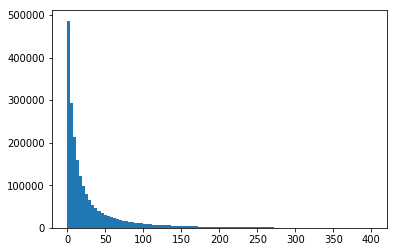

In [4]:
#histogram of the delay
plt.hist(df['ARR_DELAY'].fillna(0.0), 100, range=(0,400))

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

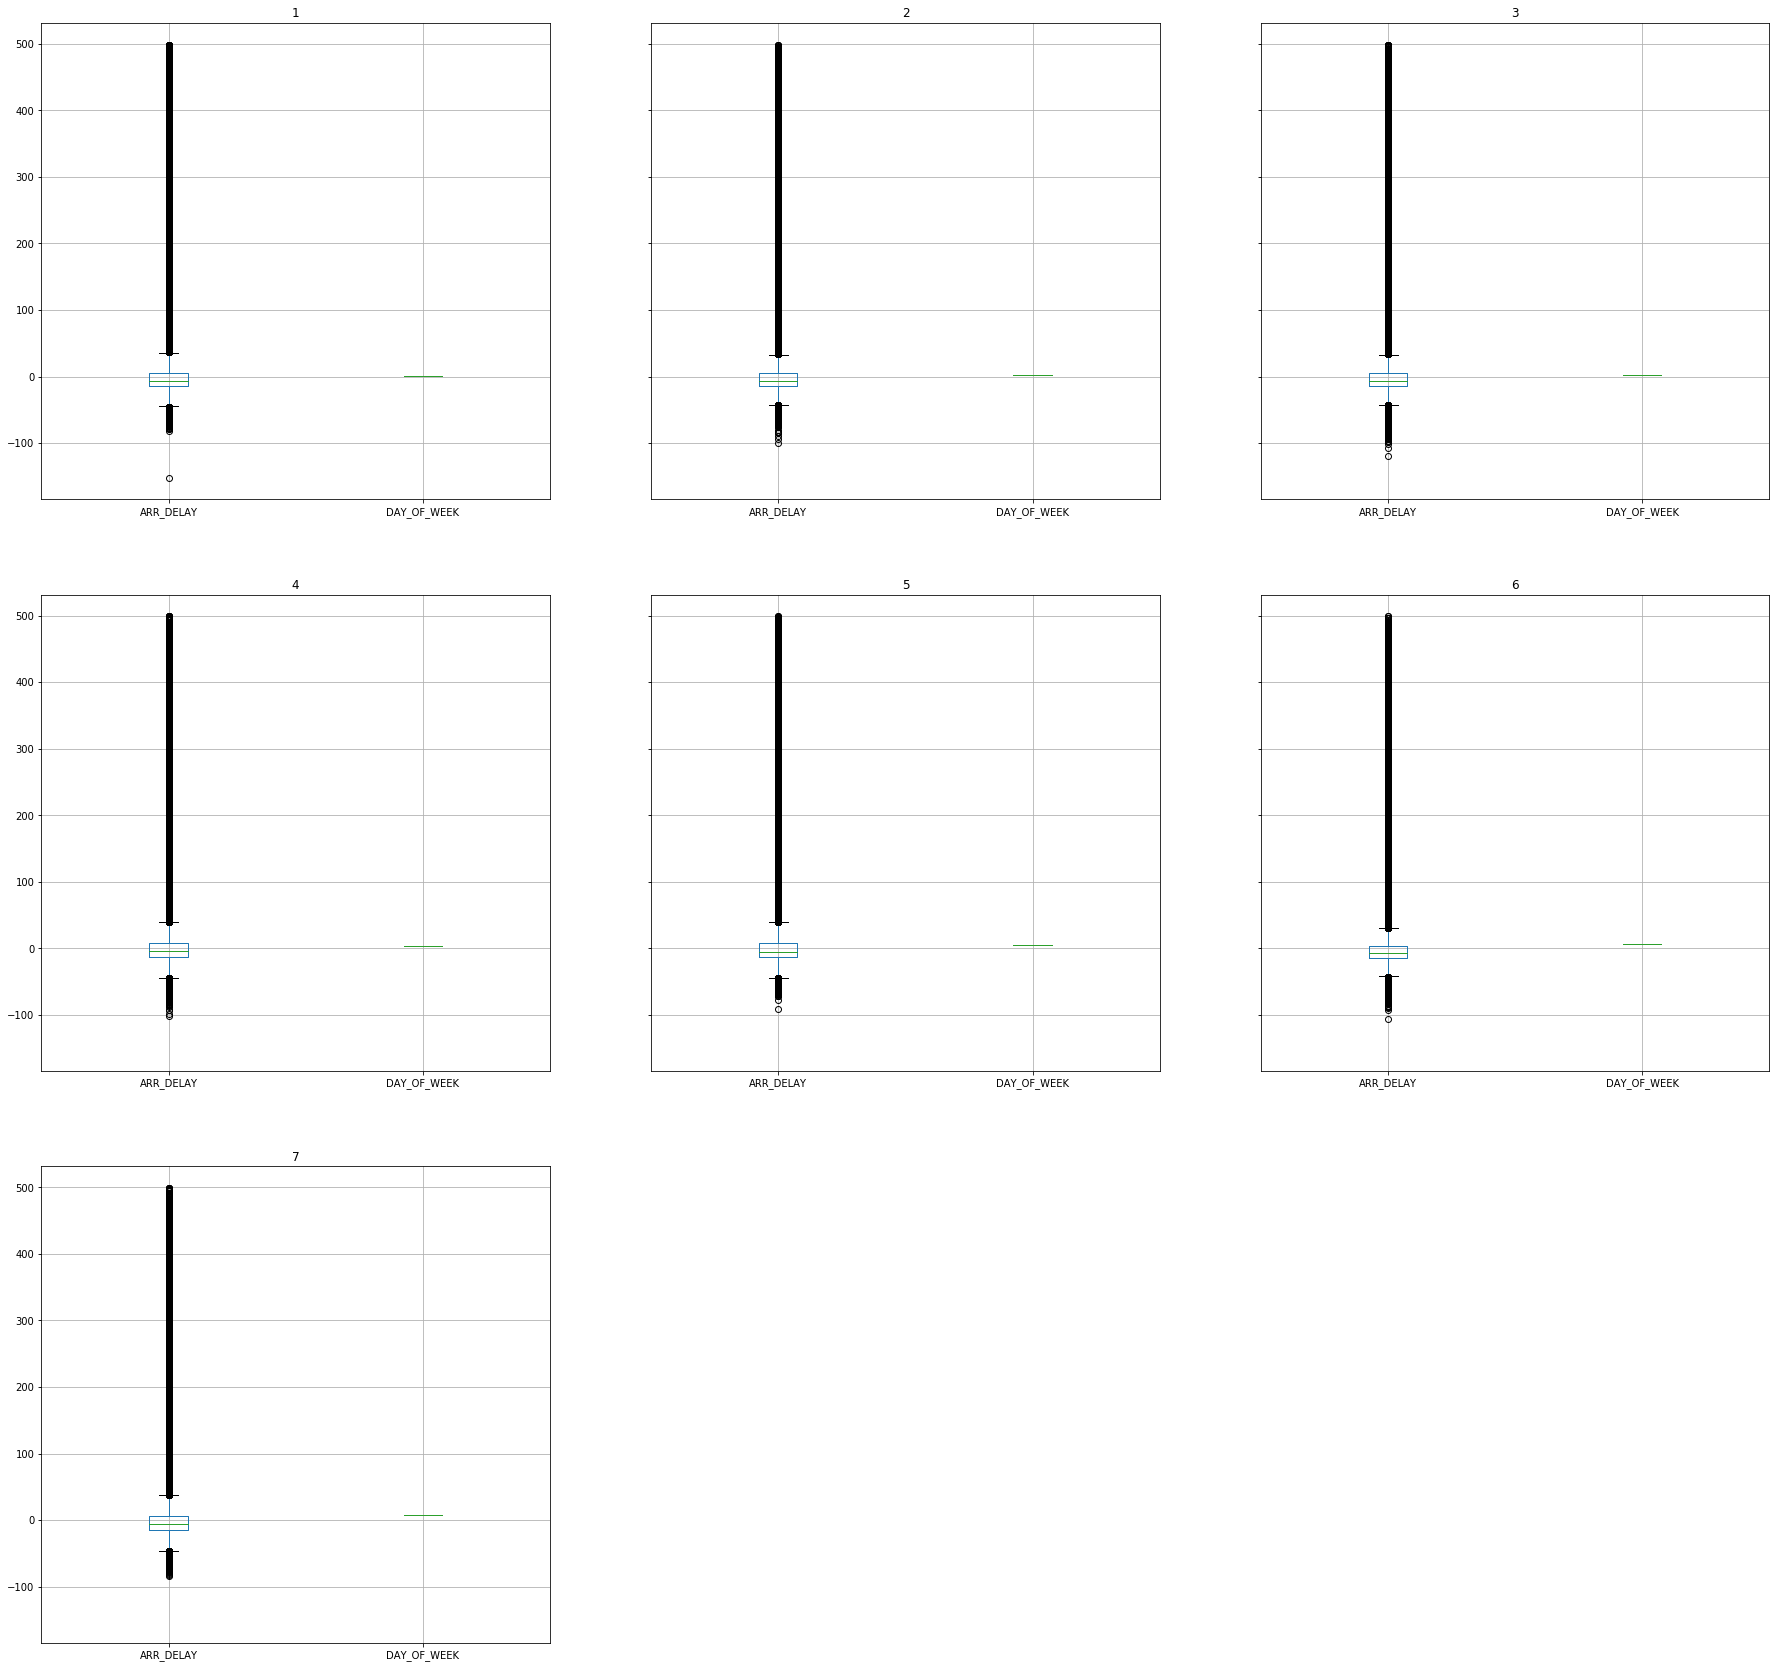

In [5]:
df2 = pd.DataFrame(df['ARR_DELAY'].fillna(0.0).astype(float))
df2['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype(int)
df2[df2['ARR_DELAY'] < 500].groupby('DAY_OF_WEEK').boxplot(figsize=(30,30))

In [6]:
df2.groupby('DAY_OF_WEEK').agg([np.std, np.mean, np.min, np.max])

ARR_DELAY                         
                   std      mean   amin    amax
DAY_OF_WEEK                                    
1            41.894343  3.782974 -152.0  1567.0
2            40.600561  2.441886 -100.0  1971.0
3            39.413829  2.291319 -119.0  1630.0
4            42.125106  5.372617 -101.0  2142.0
5            43.444543  5.437311  -91.0  1568.0
6            41.507103  1.445653 -106.0  1643.0
7            42.076776  3.200741  -84.0  2028.0